In [399]:
import numpy as num
import pylab as lab
import scipy as sci
import pandas as pan
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
#embedded function for oxygen
def FO(rhoVar,rhoe,rho_min,rho_max,\
       F00,F01,F02,F03,F04,\
       F10,F11,F12,F13,F14,\
      F20,F21,F22,F23,F24,\
      F30,F31,F32,F33,F34):
    func=[]
    for rho in rhoVar:
        if (rho>=rho_min[0] and rho<rho_max[0]):
            func.append(F00*((rho/rhoe[0])-1)**0+F20*((rho/rhoe[0])-1)**2+F10*((rho/rhoe[0])-1)**1+\
                    F30*((rho/rhoe[0])-1)**3)
        if (rho>=rho_min[1] and rho<rho_max[1]):
            func.append(F01*((rho/rhoe[1])-1)**0+F21*((rho/rhoe[1])-1)**2+F11*((rho/rhoe[1])-1)**1+\
                    F31*((rho/rhoe[1])-1)**3)
        if (rho>=rho_min[2] and rho<rho_max[2]):
            func.append(F02*((rho/rhoe[2])-1)**0+F22*((rho/rhoe[2])-1)**2+F12*((rho/rhoe[2])-1)**1+\
                    F32*((rho/rhoe[2])-1)**3)
        if (rho>=rho_min[3] and rho<rho_max[3]):
            func.append(F03*((rho/rhoe[3])-1)**0+F23*((rho/rhoe[3])-1)**2+F13*((rho/rhoe[3])-1)**1+\
                    F33*((rho/rhoe[3])-1)**3)
        if (rho>=rho_min[4] and rho<rho_max[4]):
            func.append(F04*((rho/rhoe[4])-1)**0+F24*((rho/rhoe[4])-1)**2+F14*((rho/rhoe[4])-1)**1+\
                    F34*((rho/rhoe[4])-1)**3)
    func=num.asarray(func)
    return func
    


def f(r,q,N,fe,beta,re,lam):
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

def phiN(r,A,alpha,re,kappa):
    return A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE(r,B,beta,re,lam):
    return B*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)

def phiT(r,A,alpha,re,B,beta,kappa,lam):
    return phiN(r,A,alpha,re,kappa)-phiE(r,B,beta,re,lam)

In [23]:
rhominO=[0,54.62910,65.24078,66.56797,70.57748]
rhomaxO=[54.62910,65.24078,66.56797,70.57748,10**10]
rhoe_O=[54.62910,64.26953,66.21202,66.92391,74.23105]
F0=[-1.56489,-1.58967,-1.54116,-1.51798,-1.19082]
F1=[-1.39123,1.30636,2.02821,2.30979,4.12936]
F2=[1.77199,9.81033,6.56240,7.69582,10.32338]
F3=[1.59833,0,0,0,0]
re_O,A_O,alpha_O,B_O,beta_O,lam_O,fe_O,kappa_O=3.64857,0.34900,5.44072,0.57438,3.59746,0.39310,1.39479,0.08007
gamma_O,nu_O=2.11725,0.37457
N_O=6


In [24]:
r=num.linspace(0
               ,10,10000)


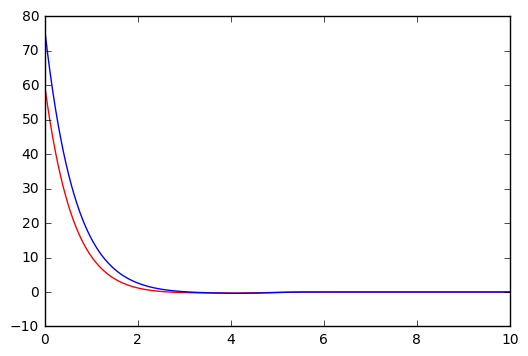

In [25]:
phi2005=phiT(r,A_O,alpha_O,re_O,B_O,beta_O,kappa_O,lam_O)
phiModified=phiN(r,A_O,alpha_O,re_O,kappa_O)-phiE(r,B_O,gamma_O,re_O,nu_O)
lab.plot(r,phi2005,"r")
lab.plot(r,phiModified,"b")

lab.show()

In [26]:
rho_O=f(r,0,N_O,fe_O,gamma_O,re_O,nu_O)
F_OU=FO(rho_O,rhoe_O,rhominO,rhomaxO,\
       F0[0],F0[1],F0[2],F0[3],F0[4],\
       F1[0],F1[1],F1[2],F1[3],F1[4],\
      F2[0],F2[1],F2[2],F2[3],F2[4],\
      F3[0],F3[1],F3[2],F3[3],F3[4])

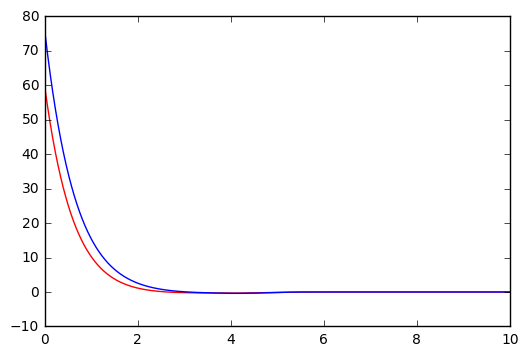

In [27]:
lab.plot(r,2*F_OU+phi2005,'r')
lab.plot(r,2*F_OU+phiModified,'b')

Bond dissociation energy of Oxygen molecule is 5.15ev/bond. So, the energy required to get rid of two bonds is 10.30ev. And at the bond length the well should be 10.30ev deep.

We can add a negative gaussain to make a dip in energy landscape to form a molecule.

gaussian=-a Exp(-(r-rb)^2/(2 w^2))

where a= 10.30+6.86=17.16 , rb=1.208 , w is free
       


In [28]:
a=7
rb=1.208
w=.01
gauss=lambda r,a,rb,w: -a*num.exp(-(r-rb)**2/(2*w**2))
gaussO=gauss(r,a,rb,w)


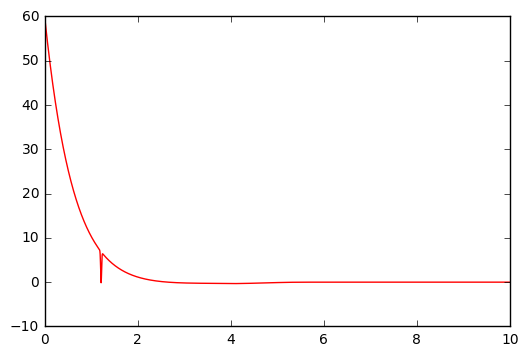

In [29]:
lab.plot(r,F_OU+phi2005+gaussO,'r')

In [30]:
morse= lambda r,De,beta,re : De*(num.exp(-2*beta*(r - re))- 2* num.exp(-beta*(r - re)))
morseO=morse(r,13.1,2.6,1.085)

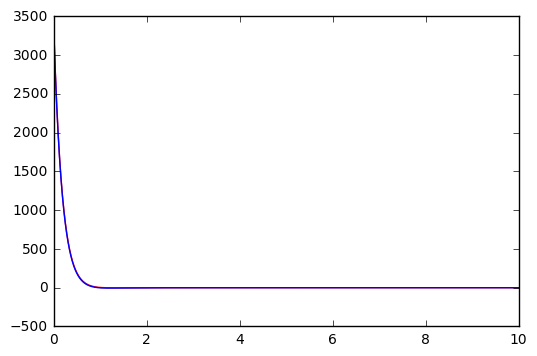

In [31]:
lab.plot(r,2*F_OU+phiModified+morseO,'r')
lab.plot(r,2*F_OU+phi2005+morseO,'b')

(-0.5, 0)

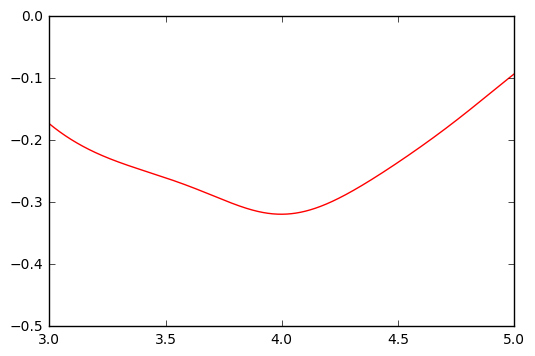

In [32]:
lab.plot(r,phi2005,'r')
lab.xlim([3,5])
lab.ylim([-.5,0])

In [613]:
def Curvature(U,Un1,Un2,delta):
    return((U-2*Un1+Un2)/delta**2)


def Slope(U,Un,delta):
    return (U-Un)/(delta)

In [618]:
def minimum(U,r,r_bound):
    a=num.logical_and(r>r_bound[0],r<r_bound[1])
    bound_r=r[a]
    bound_u=U[a]
    
    min_u=num.min(bound_u)
    min_r=bound_r[num.min(bound_u)==bound_u]
    
    index_for_min=list(bound_r).index(min_r)
    
    delta=r[index_for_min]-r[index_for_min-1]
    
    U=bound_u[index_for_min]
    Un1=bound_u[index_for_min-1]
    Un2=bound_u[index_for_min-2]
    curvature_at_minima=Curvature(U,Un1,Un2,delta)
    
    
    return [min_r,min_u,curvature_at_minima]
    

In [35]:
rbo=1.208
do=-5.11
ko=80.5454#123.53
rm=3.994399

In [627]:
De_range=num.linspace(1,10,100)
beta_range=num.linspace(1,10,100)
re_range=num.linspace(1,2,10)
#re_range=[1.207]

In [628]:
param_set=[[De,Beta,Re] for De in De_range for Beta in beta_range for Re in re_range]

In [629]:
error=[]
file=open("param_tune.dat",'w')
file.write("#De\tbeta\tre\n")
for param in param_set:
    morse_param=morse(r,param[0],param[1],param[2])
    totalField=2*F_OU+phiModified+morse_param
    try:
        bond_min=minimum(totalField,r,[.5,2])
        zhou_min=minimum(totalField,r,[3.5,4.5])
        squared_error=(rbo-bond_min[0])**2+(do-bond_min[1])**2+(ko-bond_min[2])**2+(rm-zhou_min[0])**2
        file.write("%f\t%f\t%f\t%f\n"%(param[0],param[1],param[2],squared_error))
        error.append([param[0],param[1],param[2],squared_error])
    except (RuntimeError, TypeError, NameError , ValueError, IndexError):
        continue;
    
file.close()

In [630]:
error_array=num.array(error)
min_error=min(error_array[:,3])
min_error

0.36126046670346024

In [631]:
param_pos=error_array[:,3]==min_error

In [632]:
param_De=error_array[param_pos,0]
param_De

array([ 9.63636364])

In [633]:
param_beta=error_array[param_pos,1]
param_beta

array([ 2.63636364])

In [634]:
param_re=error_array[param_pos,2]
param_re

array([ 1.66666667])

In [670]:
#lab.plot(error_array[:,3],'o')
#lab.ylim([0,10])
#lab.show()

In [664]:
def Scatter(errorArray,xAxis,yAxis,xRange,yRange,size):
    index_pos_X=num.logical_and(errorArray[:,xAxis]>xRange[0],errorArray[:,xAxis]<xRange[1])
    index_pos_Y=num.logical_and(errorArray[:,yAxis]>yRange[0],errorArray[:,yAxis]<yRange[1])
    
    index_pos=num.logical_and(index_pos_X,index_pos_Y)
    errorArrayReduced=errorArray[index_pos]
    
    figure_scatter=plt.figure(figsize=(6,6))
    plt.scatter(errorArrayReduced[:,xAxis],errorArrayReduced[:,yAxis],c=errorArrayReduced[:,3],s=size,cmap='cool')
    plt.colorbar()
    plt.xlim(xRange)
    plt.ylim(yRange)
    plt.show()
    
 

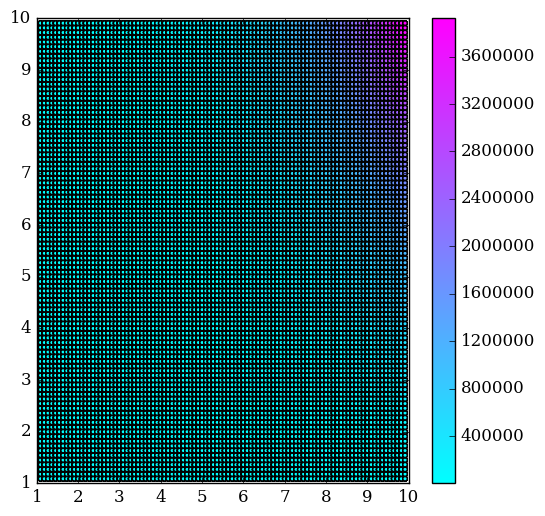

In [671]:
Scatter(error_array,1,0,[1,10],[1,10],10)

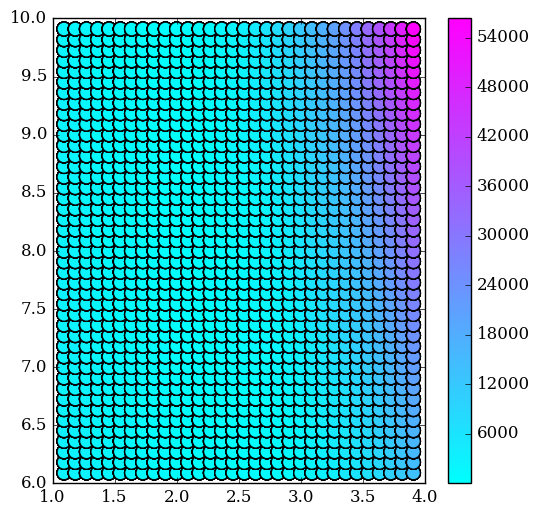

In [665]:
Scatter(error_array,1,0,[1,4],[6,10],100)

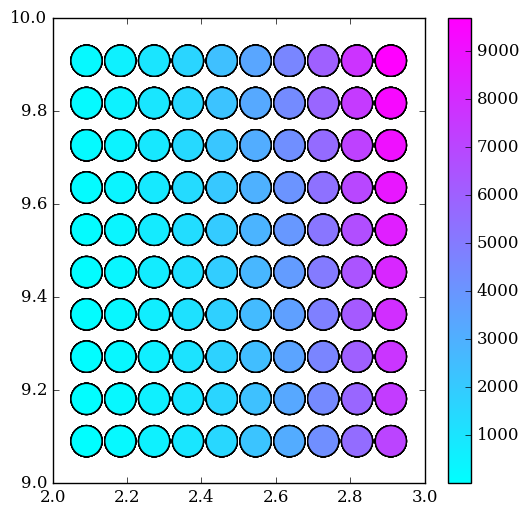

In [676]:
Scatter(error_array,1,0,[2,3],[9,10],500)

When the value of parameter De[5,7],beta[2,3],re[1,3]-->minima occurs for tuple(7,3,1.8888)

When the value of parameter De[7,9],beta[3,4],re[1,3]-->minima occurs for tuple(7,3,1.8888)

De_range=num.linspace(8,9,10)  beta_range=num.linspace(3,3.5,10)  re_range=num.linspace(1.5,2,10):: 8.7777,3.2222,1.77777

In [642]:
forceField=morseO=morse(r,param_De,param_beta,param_re)+2*F_OU+phiModified

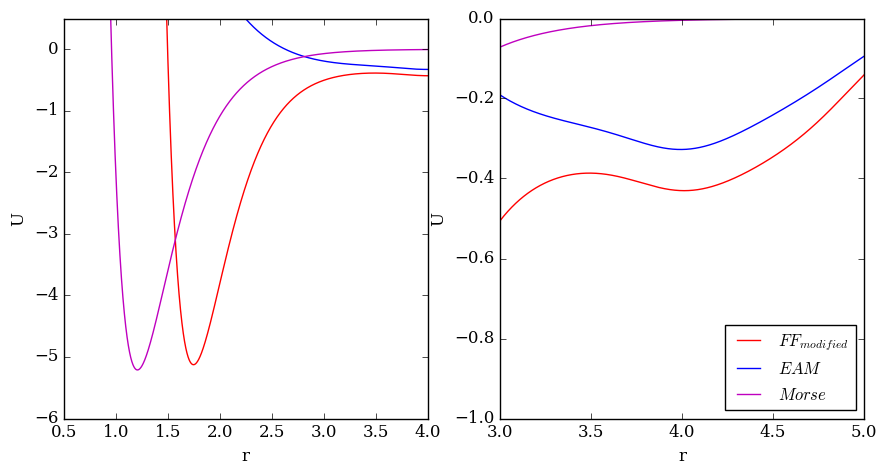

In [677]:
fig=plt.figure(figsize=(10,5))
left  =0.1# the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2  # the amount of height reserved for white space between subplots,
               # expressed as a fraction of the average axis height
    
fig.subplots_adjust(left=left,right=right,bottom=bottom,top=top,wspace=wspace,hspace=hspace)
#---------------------------------------------------------------------------------------------

#setting different parameteres
from matplotlib import rcParams
params = {
    'font.family':'serif',
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
rcParams.update(params)

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(r,forceField,'r',label="$FF_{modified}$")
ax1.plot(r,2*F_OU+phi2005,'b',label="$EAM$")
ax1.plot(r,morse(r,5.211,2.78,1.207),'m',label="$Morse$")
ax1.set_xlim([.5,4])
ax1.set_ylim([-6,.5])
ax1.set_xlabel("r")
ax1.set_ylabel("U")


ax2.plot(r,forceField,'r',label="$FF_{modified}$")
ax2.plot(r,2*F_OU+phi2005,'b',label="$EAM$")
ax2.plot(r,morse(r,5.211,2.78,1.207),'m',label="$Morse$")
ax2.set_xlim([3,5])
ax2.set_ylim([-1,0])
ax2.legend(loc="lower right")
ax2.set_xlabel("r")
ax2.set_ylabel("U")


plt.show()

In [678]:
minimum(forceField,r,[1,2])

[array([ 1.74617462]), -5.1255872419705781, 80.812039292825858]

In [679]:
minimum(forceField,r,[3,5])

[array([ 3.00030003]), -0.50436378717624664, -0.0036343913404387551]